<a href="https://colab.research.google.com/github/FayyazShaikh98/Airbnb-Booking-Analysis-EDA-/blob/main/Airbnb_EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Name: **Airbnb Exploratory Data Analysis (EDA)**

##### **Project Type** - EDA
##### **Contribution** - Individual
##### **Project by**   - Fayyaz Shaikh

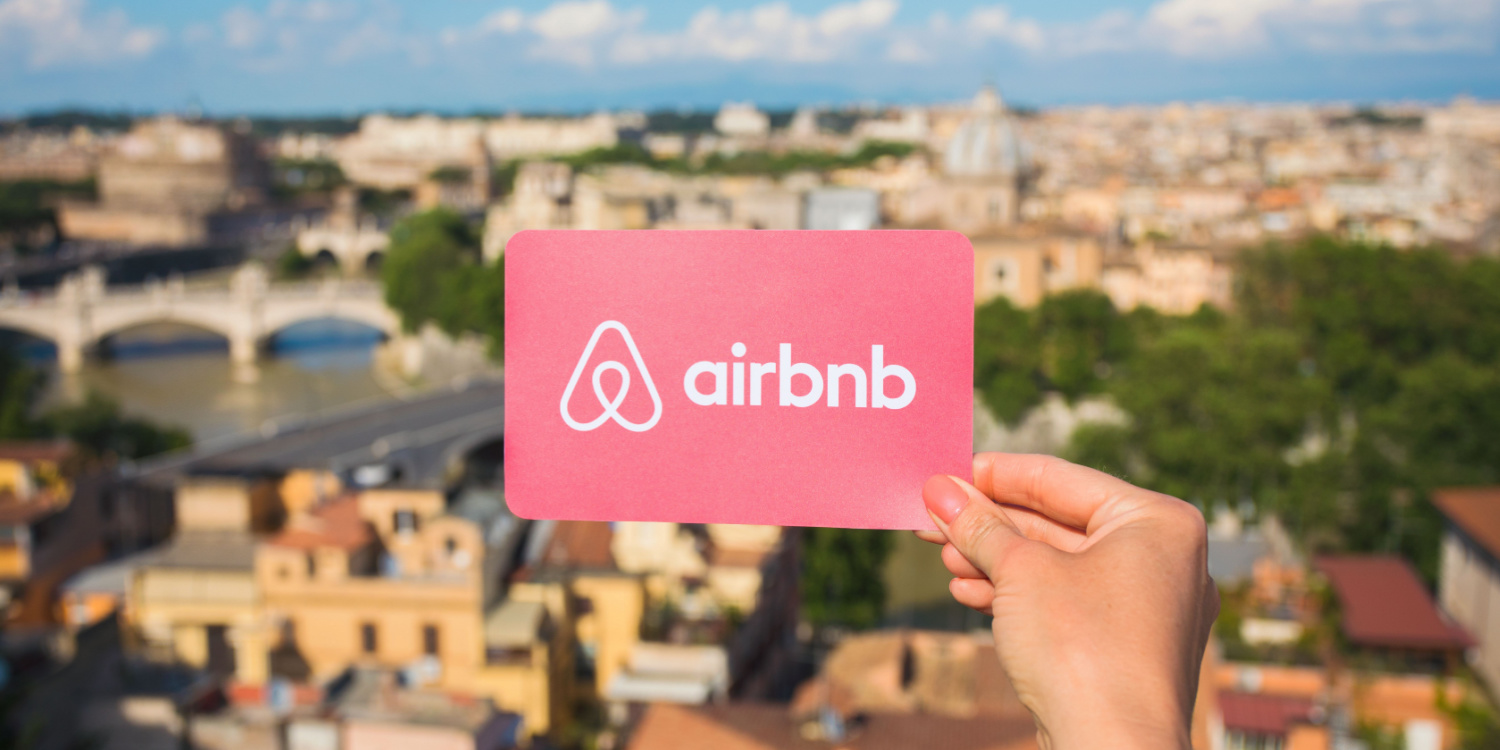

# **Project Summary -**

Airbnb is one of the online websites used worldwide for booking hotels, villas, resorts, etc. In this project, I delved into Airbnb's data to perform an Exploratory Data Analysis (EDA). The primary goal of this EDA project is to uncover valuable insights related to booking patterns, accommodation preferences, and other key metrics that can provide a deeper understanding of how users interact with the platform.

The dataset used in this analysis encompasses a variety of attributes, including different types of listings, neighborhood groups, and availability metrics. The Airbnb dataset was imported, and various data manipulation actions were taken, such as data wrangling, data cleansing, storytelling, and data visualization.

Data wrangling was performed to clean and organize the dataset, ensuring that it was ready for detailed analysis. This included handling missing values, correcting data inconsistencies, and converting data into appropriate formats.

Data cleansing was followed by storytelling, where the cleaned data was used to generate insights and narratives about booking trends and user preferences. This involved identifying key patterns and correlations within the data, such as the average price of rooms, types of neighborhood groups, total revenue generated, frequent customers, listing types, and the availability of accommodations across various neighborhoods.

Data visualization played a significant role in this project, as it helped to effectively communicate the findings from the analysis. Techniques such as kernel density estimation (KDE) plots, donut charts, pie charts, bar charts, heat maps, and correlation matrix maps were used.

Furthermore, the insights enable property owners and managers to tailor their marketing strategies more effectively. By highlighting the benefits of popular listing types and targeting specific neighborhoods with high availability, they can attract more customers and increase bookings. Additionally, addressing underperforming segments can help improve overall customer satisfaction and ensure that the offerings align with user preferences.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**

**Write Problem Statement Here.**

In the competitive short-term rental market, understanding the factors that influence property bookings and revenue is essential for optimizing performance and enhancing customer satisfaction. Despite having access to extensive data, actionable insights into how variables like room type, neighborhood, pricing, and availability impact overall business outcomes are often lacking. This project aims to address this gap by analyzing key factors such as the relationship between room types and revenue, the distribution of prices across different neighborhoods, and the patterns of property availability throughout the year. It will also evaluate host performance across various areas to identify top performers and areas needing improvement. By investigating these aspects, the project seeks to provide actionable recommendations for refining pricing strategies, improving inventory management, and expanding market reach. Ultimately, the insights gained will help the Airbnb platform make informed decisions that drive growth, maximize revenue, and enhance the experience for both hosts and guests.

#### **Define Your Business Objective?**

Answer Here.

1. Analyze the total revenue generation of neighbourhood group
2. Examine the patterns of bookings based on room types ie (Entire/home apt, Private room and Shared room)
3. To identify the top host name with number of time occurence
4. Percentage of bookings by neighbour hood group
5. Average minimum night stays
6. Based on the findings from the exploratory data analysis (EDA), identify potential areas where hotel operations could be improved or optimized.
7. The count of listings and their dominance within each neighborhood group, as well as the total revenue generated.

# ***Let's Begin !***

## ***1. Know Your Data***

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-1-485e6877fc9f>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [2]:
# importing dataset from google drive Airbnb_csv file
from google.colab import drive
drive.mount('/content/drive')
airbnb_data = pd.read_csv('/content/drive/MyDrive/Almabetter/Datasets/Airbnb NYC 2019.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Airbnb data view
# Using .head() function revewing the overall airbnb dataset
airbnb_data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
airbnb_data.shape
print('Number of rows:', airbnb_data.shape[0])
print('Number of columns:', airbnb_data.shape[1])

Number of rows: 48895
Number of columns: 16


### Dataset Information

In [5]:
# Dataset Info
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
airbnb_data.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# Visualizing the missing values
missing_values = airbnb_data.isnull().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### What did you know about your dataset?

Answer Here
1. The Airbnb data set contains 48895 rows and 16 columns.
2. The data set contains of integer, object and float values
3. The data set has 4 columns which contains null values these are: ('name', host_name, last_review, reviews_per_month)
4. The data set contains total of 20,141 null values


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
# Dataset Describe
airbnb_data.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### Variables Description

Answer Here.

id: Unique id of customers

name : name of the customers

host_id : unique identifier assigned to each host

host_name : Host name

neighbourhood_group : neighbourhood_group is the location of the hotel's listed in particular area

neighbourhood: neighbourhood is the area or district where the listings is located

latitude: Latitude is a measure of the distance north or south of the equator

longitude: Longitude is a measure of the distance east or west of the prime meridian

room_type: Type of room ie > (Entire/home apt), (Private), (Shared)

price: Price of each listings

minimum_nights: Minimum nights stay by the customer

number_of_reviews: count of Reviews by the customers

last_review: customer last review of the specific listings

reviews_per_month: count of reviews by the customers per month

calculated_host_listings_count: count of the total number of rooms that a particular host is managing.

availability_365: Number of days in a year that a listing is available for booking.



### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
airbnb_data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

<Axes: >

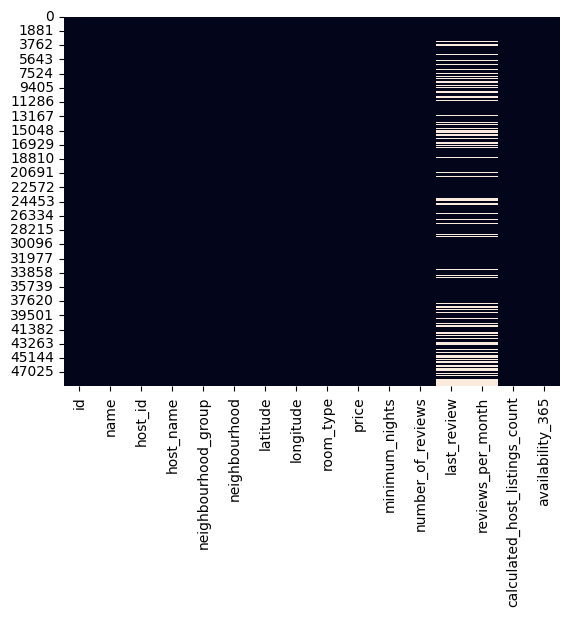

In [12]:
# Write your code to make your dataset analysis ready.
# making a copy of airbnnb data set
airbnb_df = airbnb_data.copy()
# from the null_values it can be seen that the colum (last_review) and (reviews_per_month) has maximum null values
# Implementing heat map to see the null values in data set
sns.heatmap(airbnb_df.isnull(), cbar=False)

In [13]:
# Adding a new column to analyse the count of reviews
airbnb_df['host_reviews_count'] = airbnb_df.groupby('host_id')['number_of_reviews'].transform('sum')

In [14]:
# Adding a new column to analyse the count of listings for particular host
airbnb_df['host_listings_count'] = airbnb_df.groupby('host_id')['calculated_host_listings_count'].transform('mean')

In [15]:
# Getting average nights stay
airbnb_df_avg_nights = (airbnb_df['minimum_nights']).mean()
print("The average nights stay is", round(airbnb_df_avg_nights))

The average nights stay is 7


In [16]:
# unique neighbourhood states
airbnb_df['neighbourhood_group'].unique()
print("Unique neighbour_hood states are:", airbnb_df['neighbourhood_group'].unique())

# count of unique neighbourhood states
print("Unique neighbour_hood states are:", airbnb_df['neighbourhood_group'].nunique())

Unique neighbour_hood states are: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique neighbour_hood states are: 5


In [17]:
airbnb_df['number_of_reviews'].value_counts()

number_of_reviews
0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: count, Length: 394, dtype: int64

In [18]:
no_of_reviews = airbnb_df['number_of_reviews'].value_counts().sum()
print('The sum of number_of_reviews are', no_of_reviews)

The sum of number_of_reviews are 48895


In [19]:
# host_name counts groupby neighbourhood_group
host_name_counts = airbnb_df.groupby(['neighbourhood_group'])['host_name'].count()
print(host_name_counts)

neighbourhood_group
Bronx             1090
Brooklyn         20095
Manhattan        21652
Queens            5664
Staten Island      373
Name: host_name, dtype: int64


In [20]:
# host_name with room type as private room
host_name_with_private_room = airbnb_df.loc[airbnb_df['room_type'] == 'Private room'].shape[0]
print('The total host with room type as private_room is:',host_name_with_private_room)

The total host with room type as private_room is: 22326


In [21]:
# host_name with room type as Entire home/apt
host_name_with_entire_home_apt = airbnb_df.loc[airbnb_df['room_type'] == 'Entire home/apt'].shape[0]
print('The total host with room type as Entire home/apt is:', host_name_with_entire_home_apt)

The total host with room type as Entire home/apt is: 25409


In [22]:
# host_name with room type as shared
host_name_with_shared_room = airbnb_df.loc[airbnb_df['room_type'] == 'Shared room'].shape[0]
print('The total host with room type as Shared room is:',host_name_with_shared_room)

The total host with room type as Shared room is: 1160


In [23]:
# Sum of host by room types
sum_of_host = (host_name_with_entire_home_apt) + (host_name_with_private_room) + (host_name_with_shared_room)
print('Sum of host by room types is:', sum_of_host)

Sum of host by room types is: 48895


In [24]:
# Average price of rooms groupby neighbour_hood per night
avg_price_per_neighbourhood = airbnb_df.groupby(['neighbourhood_group'])['price'].mean()
print("Average price of room groupby neighbour_hood per night is:")
print(f'{round(avg_price_per_neighbourhood)}')

Average price of room groupby neighbour_hood per night is:
neighbourhood_group
Bronx             87.0
Brooklyn         124.0
Manhattan        197.0
Queens           100.0
Staten Island    115.0
Name: price, dtype: float64


In [25]:
private_rooms = airbnb_df[airbnb_data['room_type'] == 'Private room']

# Group by neighbourhood_group and calculate the mean price
avg_private_room_price = private_rooms.groupby('neighbourhood_group')['price'].mean()

print("Average price of private room groupby neighbourhood_group per night is")
print(round(avg_private_room_price))

Average price of private room groupby neighbourhood_group per night is
neighbourhood_group
Bronx             67.0
Brooklyn          77.0
Manhattan        117.0
Queens            72.0
Staten Island     62.0
Name: price, dtype: float64


In [26]:
entire_home_rooms = airbnb_df[airbnb_df['room_type'] == 'Entire home/apt']

# Group by neighbourhood_group and calculate the mean price
avg_entire_home_room_price = entire_home_rooms.groupby('neighbourhood_group')['price'].mean()

print("Average price of Entire home/apt room groupby neighbourhood_group per night is")
print(round(avg_entire_home_room_price))

Average price of Entire home/apt room groupby neighbourhood_group per night is
neighbourhood_group
Bronx            128.0
Brooklyn         178.0
Manhattan        249.0
Queens           147.0
Staten Island    174.0
Name: price, dtype: float64


In [27]:
shared_rooms = airbnb_df[airbnb_data['room_type'] == 'Shared room']

# Group by neigghbourhood_group and calculating the mean price
avg_share_price_room = shared_rooms.groupby('neighbourhood_group')['price'].mean()

print("Average price of private room groupby neighbourhood_group per night is")
print(round(avg_share_price_room))

Average price of private room groupby neighbourhood_group per night is
neighbourhood_group
Bronx            60.0
Brooklyn         51.0
Manhattan        89.0
Queens           69.0
Staten Island    57.0
Name: price, dtype: float64


### Dealing with Null Vlaues

In [28]:
# Filling null values.
# null values in id column
airbnb_df['id'].fillna(0, inplace = True)

In [29]:
# null values in name column
airbnb_df['name'].fillna(0, inplace = True)

In [30]:
# null values in host_name column
airbnb_df['host_name'].fillna(0, inplace = True)

In [31]:
# null values in id column
airbnb_df['id'].fillna(0, inplace = True)

In [32]:
# null values in name column
airbnb_df['name'].fillna(0, inplace = True)

In [33]:
# null values in host_name column
airbnb_df['host_name'].fillna(0, inplace = True)

In [34]:
# null values in reviews_per_month column
airbnb_df['reviews_per_month'].fillna(0, inplace = True)

In [35]:
# null values in last_review column
airbnb_df['last_review'].fillna(0, inplace = True)

### Duplicated values in data set

In [36]:
# counting duplicated values in airbnb data set
duplicated_values = airbnb_df.duplicated().sum()
print("The duplicated values in airbnb data set is", duplicated_values,".")

The duplicated values in airbnb data set is 0 .


In [37]:
# Unique values in each columns of data set
for i in airbnb_df.columns.tolist():
  print("No. of unique values in ",i,"is",airbnb_df[i].nunique())

No. of unique values in  id is 48895
No. of unique values in  name is 47906
No. of unique values in  host_id is 37457
No. of unique values in  host_name is 11453
No. of unique values in  neighbourhood_group is 5
No. of unique values in  neighbourhood is 221
No. of unique values in  latitude is 19048
No. of unique values in  longitude is 14718
No. of unique values in  room_type is 3
No. of unique values in  price is 674
No. of unique values in  minimum_nights is 109
No. of unique values in  number_of_reviews is 394
No. of unique values in  last_review is 1765
No. of unique values in  reviews_per_month is 938
No. of unique values in  calculated_host_listings_count is 47
No. of unique values in  availability_365 is 366
No. of unique values in  host_reviews_count is 549
No. of unique values in  host_listings_count is 47


### What all manipulations have you done and insights you found?

Answer Here. I first made a copy of the Airbnb dataset, which initially contained 20,141 null values. After filling in these null values in the copied dataset, I added two new columns: host_reviews_count to analyze the number of reviews for each host, and host_listings_count to examine the total number of listings per host.

I then examined the dataset for unique and non-unique values, calculated the average number of nights stayed by customers, and identified the unique neighborhood groups. I also performed value counts for the number of reviews, implemented code to find the sum of host occurrences, analyzed the distribution of prices by room type, and calculated the total revenue generated by each room type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Average price of room type

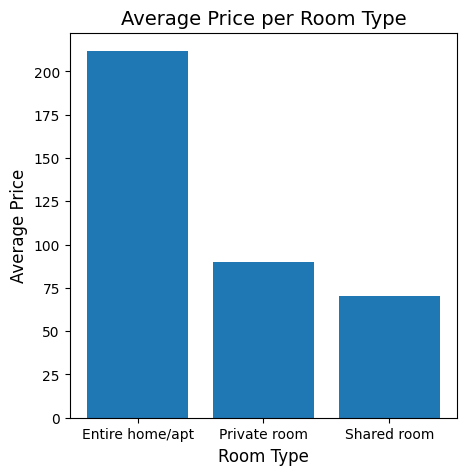

In [38]:
# Chart - 1 visualization code
x = airbnb_df['room_type']
y = airbnb_df['price']

#ploting the average price per room type
avg_price_per_room_type = airbnb_df.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(5, 5))  # Optional: Adjust the figure size for better readability
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.bar(avg_price_per_room_type['room_type'], avg_price_per_room_type['price'],)
plt.title('Average Price per Room Type', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. A bar chart is an effective tool for visualizing categorical data and comparing quantities across different groups. It provides a clear visual representation of how the average price varies across different room types, enabling easy identifing of trends and differences. By using a bar chart, I was able to effectively compare the average prices for each room type, making it simpler to interpret and communicate the data insights.


##### 2. What is/are the insight(s) found from the chart?

Answer Here. By plotting the bar chart i have found that the average price for room_type (Entire home/apt) is high as compare to the other two room type

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here Gained insights will help the Airbnb Hotel marketing team in pricing the hotels room by room type and it also seen that the Entire/Home Apt is more preferred then the other two room types category.

#### Chart - 2 Booking percentage of rooms by Neighbourhood group

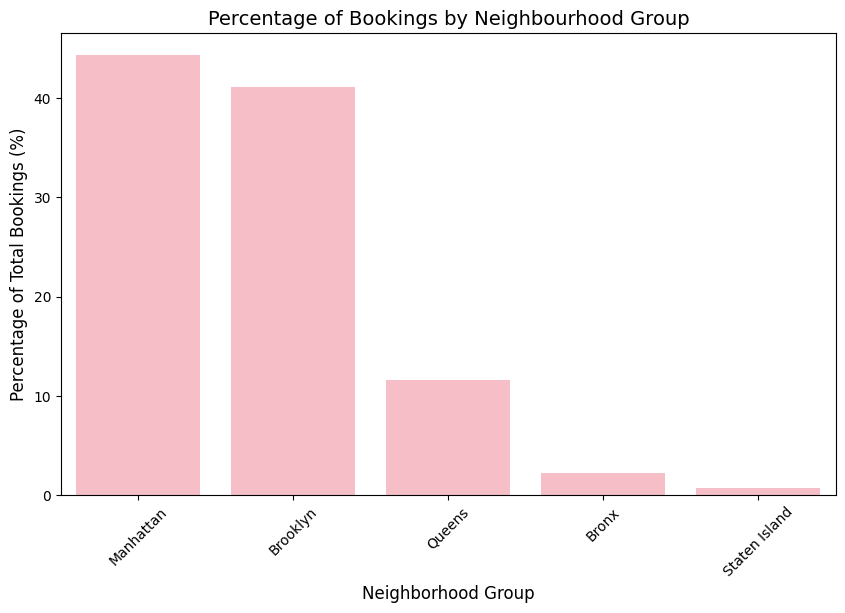

In [39]:
# Chart - 2 visualization code

booking_counts = airbnb_df['neighbourhood_group'].value_counts()

# Calculate the percentage of bookings
booking_percentages = (booking_counts / booking_counts.sum()) * 100

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=booking_percentages.index, y=booking_percentages.values, color = 'lightpink')

# Add title and labels
plt.title('Percentage of Bookings by Neighbourhood Group', fontsize=14)
plt.xlabel('Neighborhood Group', fontsize=12)
plt.ylabel('Percentage of Total Bookings (%)', fontsize=12)

# Show the plot
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here. Bar charts gives the clear explanation of the data in a various forms such as types, different variables, and percentage etc. It is one of the most commom type of charts used for analysing and visualizing the data in different forms. I had selected this bar chart to analyze the percentage of bookings by neighbourhood_group


##### 2. What is/are the insight(s) found from the chart?

Answer Here. From the bar chart, we can observe that the majority of bookings are for the "Entire home/apt" category, which occupies approximately 70% of the chart. This indicates a strong preference among users for entire properties, possibly due to the privacy and space they offer. The next significant segment is "Private room" with around 20%, suggesting that a good number of customers prefer a more budget-friendly option while still seeking some privacy. The "Shared room" category, with the smallest segment at around 10%, shows that this type of accommodation is the least preferred among the users. These insights can help property owners and managers to tailor their offerings and marketing strategies to align with customer preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here. Yes These insights can help property owners and managers to tailor their offerings and marketing strategies to align with customer preferences.

#### Chart - 3 Distribution of Neighbourhood group

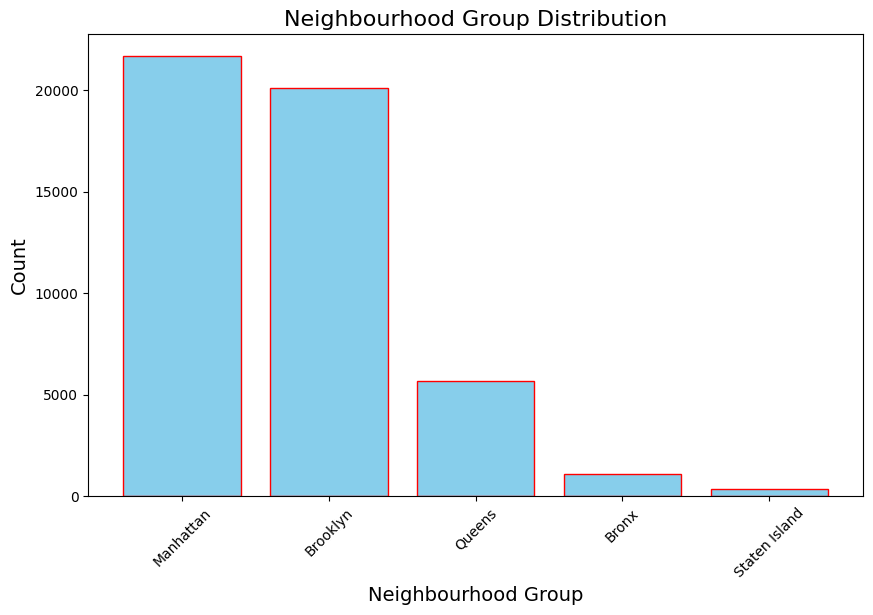

In [40]:
# Chart - 3 visualization code
neighborhood_group_counts = airbnb_df['neighbourhood_group'].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(neighborhood_group_counts.index, neighborhood_group_counts.values, color='skyblue', edgecolor='red')

# Add labels and title
plt.xlabel('Neighbourhood Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Neighbourhood Group Distribution', fontsize=16)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. The bar chart is a very useful when it comes to compare the different aspects. I had picked histogram chart in order to get count of the neighbourhood groups

##### 2. What is/are the insight(s) found from the chart?

Answer Here. I have observed that the neighborhoods of Staten Island and the Bronx have notably low listing counts. According to the chart, the business management team should implement targeted strategies to increase the number of listings in these areas and attract more customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here. The insight that Staten Island and the Bronx have low listing counts presents an opportunity for growth. By increasing the number of listings in these neighborhoods, the business can enhance its market presence and potentially capture a larger share of the local market, leading to higher revenue and greater customer reach.

#### Chart - 4  Price Distribution by room type

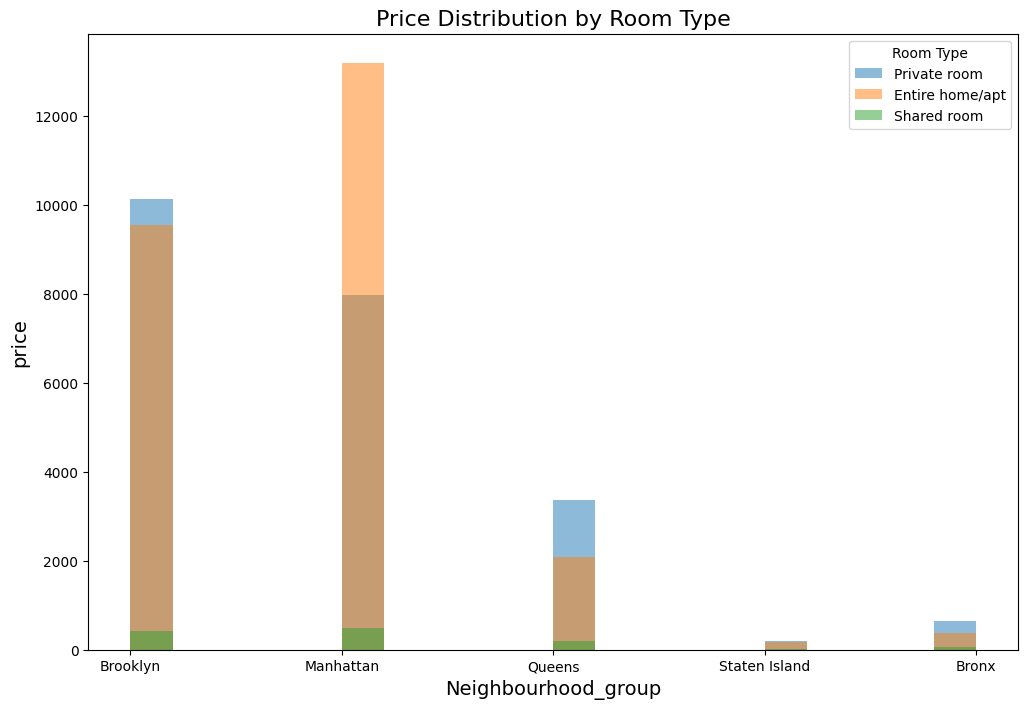

In [41]:
# Chart - 4  visualization code
room_types = airbnb_df['room_type'].unique()

# Plotting the histogram for prices grouped by room type
plt.figure(figsize=(12, 8))

# Loop through each room type and plot a histogram
for room_type in room_types:
    subset = airbnb_df[airbnb_df['room_type'] == room_type]
    plt.hist(subset['neighbourhood_group'], bins=20, alpha=0.5, label=room_type)

# Add labels and title
plt.xlabel('Neighbourhood_group', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.title('Price Distribution by Room Type', fontsize=16)
plt.legend(title='Room Type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. The histogram chart is picked to plot the distribution of price by room type.

##### 2. What is/are the insight(s) found from the chart?

Answere Here. From the chart we can see that the price distribution is overlapping in Manhattan neighbourhood group for Entire/home apt and Private room, this reveals that majorirty of the price distribution is similar for both the room types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Answere Here. This insight can be beneficial in several ways. it can guide strategic pricing adjustments to better reflect the distinct value propositions of each room type, potentially leading to optimized revenue and improved competitive positioning. Understanding that prices are similar can also help tailor marketing efforts to highlight other differentiators such as location, amenities, or guest experience.

#### Chart - 5 Average of Minimum night stays by Neighbourhood group

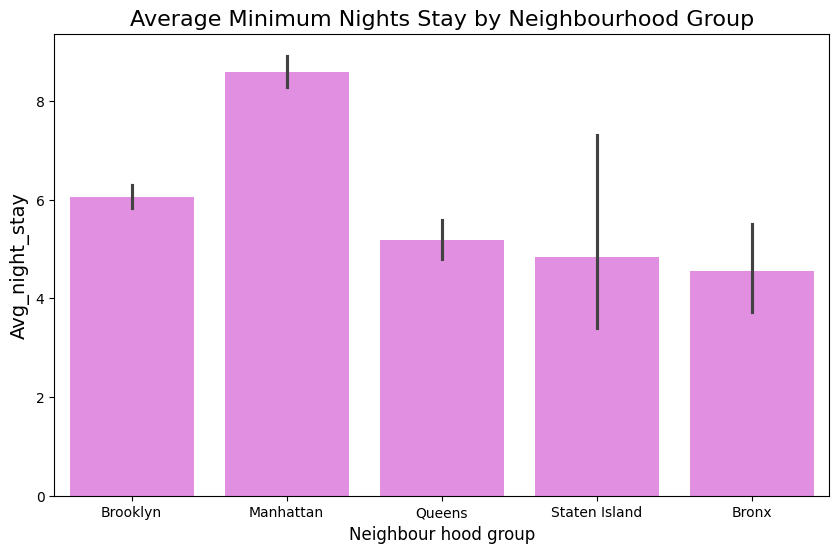

In [42]:
# Chart - 5 visualization code
Avg_night_stay = airbnb_df['neighbourhood_group']
neighbourhood_groups = airbnb_df['minimum_nights']

# Set up the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=Avg_night_stay, y=neighbourhood_groups, color='violet')

# Add labels and title
plt.xlabel('Neighbour hood group', fontsize=12)
plt.ylabel('Avg_night_stay', fontsize=14)
plt.title('Average Minimum Nights Stay by Neighbourhood Group', fontsize=16)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?


Answere Here. The bar plot was picked in order to analyse the average night stays according to the neighbourhood.

##### 2. What is/are the insight(s) found from the chart?


Answere Here. The Average minimum night stays by neighbourhood_group in Manhattan is 8.5 days where as the brroklyn has 6 days and the rest of the neighbourhood_group lies between 4.5 to 5. It has been clear seen that the customers prefers Manhattan and broklyn as a preferred neighbourhood_group

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answere Here. Yes by adding more listings in Manhattan and broklyn the customers can stay for long weeks as the availability of the listings will increase

#### Chart - 6 Total Revenue Distribution by Neighbourhood Group

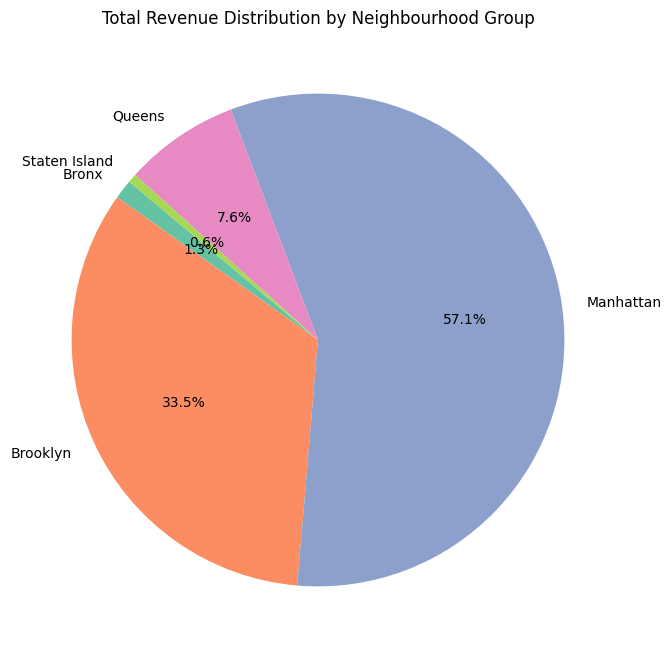

In [43]:
# Chart - 6 visualization code
total_revenue = airbnb_df.groupby('neighbourhood_group')['price'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(total_revenue, labels=total_revenue.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Total Revenue Distribution by Neighbourhood Group')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### 1. Why did you pick the specific chart?


Answere Here. The pie chart is picked to analyse the total revenue generated by each neighbourhood group.

##### 2. What is/are the insight(s) found from the chart?


Answere Here. The total revenue generated by each neighbourhood group is shown in the pie chart, about 57.1 % revenue is generated from Manhattan, 33.5 % is generated from Brooklyn. The remaining 10% is contributed by the other neighborhoods. This data underscores the dominant role of Manhattan and Brooklyn in revenue generation, with a significant majority coming from these two areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Answere Here. From the pie chart i have analyzed that there are both Positive and Negative impact to the business.

Positive impact:
1. Manhattan and Brooklyn generating a combined 90.6% of revenue, directing more marketing and investment resources towards these neighborhoods can enhance profitability and strengthen market presence.
2.pricing strategies based on revenue distribution can help in maximizing revenue, particularly if higher rates can be supported in high-revenue areas.

Negative impact:
1. Dependence on Manhattan and Brooklyn poses risks if these areas face economic or regulatory changes. Diversifying revenue sources is important to mitigate this risk.
2.The 10% revenue from other neighborhoods suggests potential underutilization.


#### Chart - 7 Average of Night satys by room type

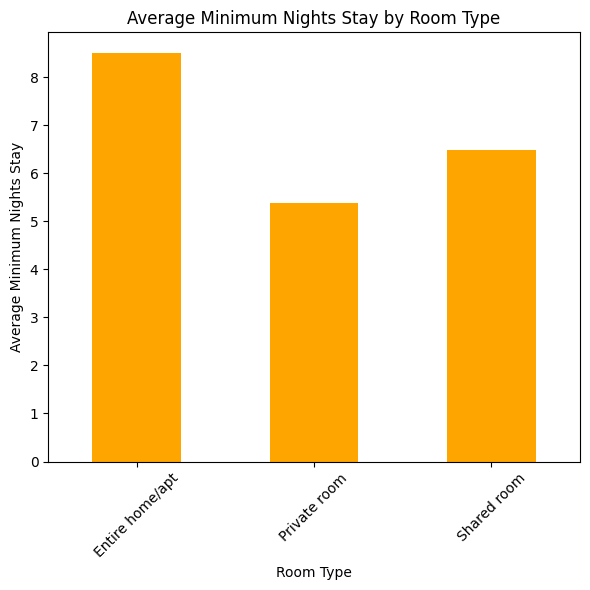

In [44]:
# chart - 7 visualization code
avg_stay_by_room_type = airbnb_df.groupby('room_type')['minimum_nights'].mean()

# Plotting the bar chart
plt.figure(figsize=(6, 6))
avg_stay_by_room_type.plot(kind='bar', color='orange')

# Add labels and title
plt.xlabel('Room Type', fontsize=10)
plt.ylabel('Average Minimum Nights Stay', fontsize=10)
plt.title('Average Minimum Nights Stay by Room Type', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?


Answere Here. I had picked this chart because, this chart will give us a clear understanding about the average minimum night stays by the customer based on the room type preferences.

##### 2. What is/are the insight(s) found from the chart?


Answere Here. The average number of nights guests stay in an entire home or apartment is 8.5 days, while for shared rooms, it is 6.5 days. In contrast, private rooms see a shorter average stay of 5.5 days. This suggests that accommodations offering the entire home or apartment provide a more extended stay compared to shared or private rooms, potentially indicating a preference for greater privacy and comfort. Shared rooms, while still popular, offer slightly shorter stays, and private rooms attract guests who stay for the shortest duration on average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answere Here. It will create a positive impact to the business model by implementing pricing strategies based on stay duration and room type preferences. Like for eg:- offering discounts for longer stays in entire homes/apartments or promotional rates for last-minute bookings in private and shared rooms can maximize occupancy and revenue.

#### Chart - 8 Number of Bookings by room type

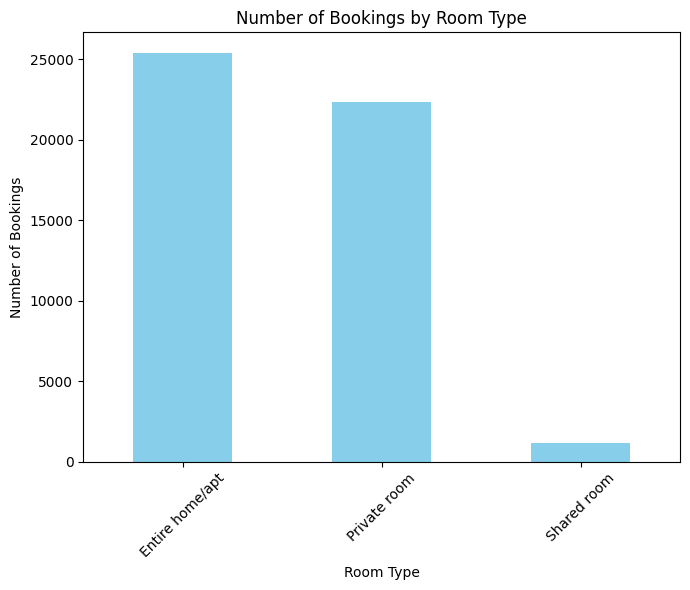

In [45]:
# chart - 8 visualization code
booking_counts = airbnb_df['room_type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(7, 6))
booking_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Room Type', fontsize=10)
plt.ylabel('Number of Bookings', fontsize=10)
plt.title('Number of Bookings by Room Type', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


Answere Here. The count of bookings by room type can be identified by implementing the bar chart that's why i had picked this chart.

##### 2. What is/are the insight(s) found from the chart?


Answere Here. From the chart, we observe that Entire home/apartment and Private room bookings are the most popular, with bookings ranging from 22,000 to 25,000. In contrast, Shared rooms have significantly fewer bookings, ranging from 1 to 100. This indicates a clear preference among customers for Entire home/apt and Private rooms over Shared rooms, likely due to the greater privacy and amenities offered.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answere Here. There are some positive as well as negative business impact insights found:

Positive impact: By uderstanding that Entire home/apt and Private rooms are more popular allows businesses to focus on these types of accommodations. This can lead to better resource allocation and optimization of inventory based on customer preferences, and can potentially increase bookings and revenues.

Negative impact: The significant gap in bookings for Shared rooms suggests a potential issue with this type of accommodation. The businesses do not address the lower demand, Shared rooms may continue to underperform, which could lead to wasted resources and missed revenue opportunities hence to overcome this negative impact the business and marketing team should aprroach and influence the customers to book the shared room with additional the business management team can also add some offers, discounts, and other aminities so that the demand and bookings for shared room will increase.

##### Chart - 9 Scatter plot for Price vs Minimum Night stays

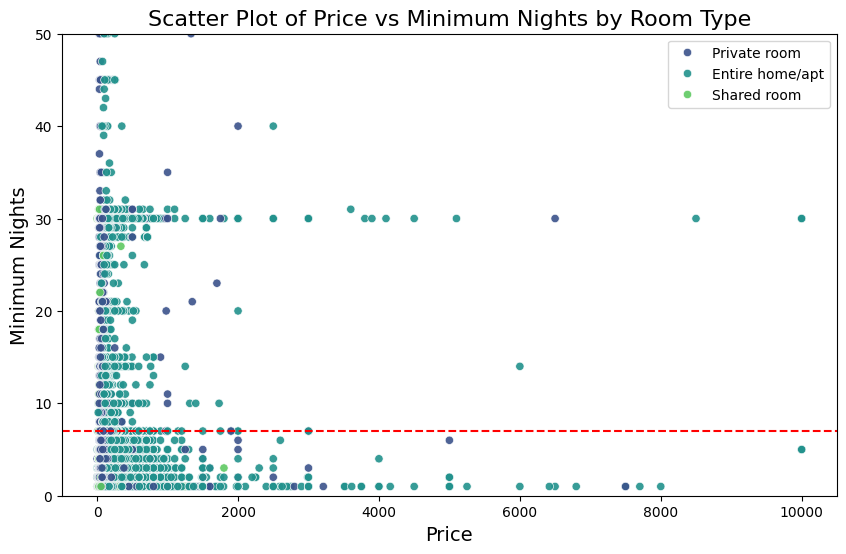

In [46]:
# chart - 9 visualization code
average_minimum_nights = airbnb_df['minimum_nights'].mean()
y_min_limit = 0
y_max_limit = 50
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airbnb_data, x='price', y='minimum_nights', hue='room_type', palette='viridis', alpha=0.9)
plt.axhline(y=average_minimum_nights, color='red', linestyle='--', )
plt.ylim(y_min_limit, y_max_limit)

# Adding labels
plt.xlabel('Price', fontsize=14)
plt.ylabel('Minimum Nights', fontsize=14)
plt.title('Scatter Plot of Price vs Minimum Nights by Room Type', fontsize=16)
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?


Answere Here.  I had picked the scatter because it provides a clear view of how price and minimum_nights relate to each other and vary by room_type.

##### 2. What is/are the insight(s) found from the chart?

Answere Here. The red dotted line indicates the average night stays. The Entire home/apt is more displayed in the plot vs the price where as the Private room and Shared room is less displayed this is due to the price similarity. The price for shared and privte room is very much similar is many cases. From this we can identify that for the same price the customers are more preferred to the Entire/home apt as compare to the private and shared rooms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answere Here. It has a negative impact because the price vs the minimum night stays of Entire/home apt is very much similar to the Private room and shared room due to the similarity in the price the customers preferred privte rooms or Shared rooms

#### Chart - 10 Distribution of Availability based on Neighbourhood group

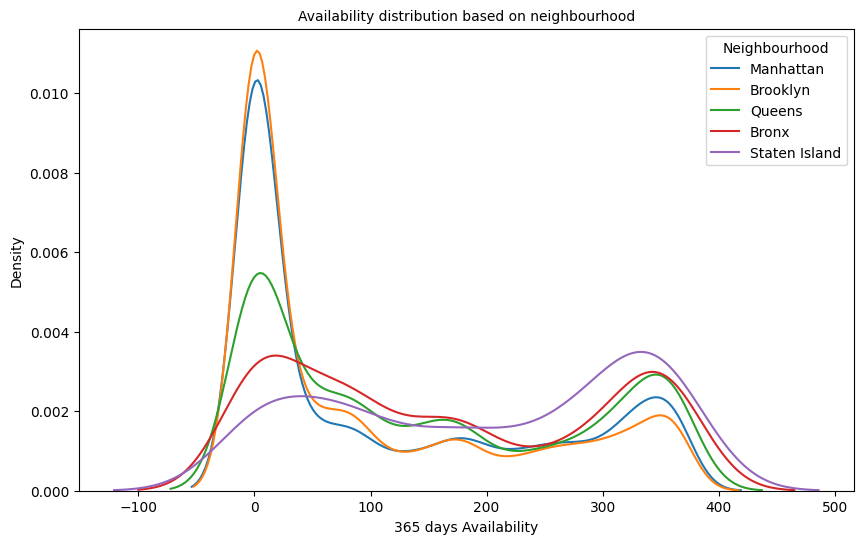

In [47]:
# chart - 10 visualization code
plt.figure(figsize=(10, 6))
sns.kdeplot(airbnb_df[airbnb_df['neighbourhood_group'] == 'Manhattan']['availability_365'],label = 'Manhattan')
sns.kdeplot(airbnb_df[airbnb_df['neighbourhood_group'] == 'Brooklyn']['availability_365'],label = 'Brooklyn')
sns.kdeplot(airbnb_df[airbnb_df['neighbourhood_group'] == 'Queens']['availability_365'],label = 'Queens')
sns.kdeplot(airbnb_df[airbnb_df['neighbourhood_group'] == 'Bronx']['availability_365'],label = 'Bronx')
sns.kdeplot(airbnb_df[airbnb_df['neighbourhood_group'] == 'Staten Island']['availability_365'],label = 'Staten Island')
plt.legend()
plt.title('Availability distribution based on neighbourhood', fontsize=10)
plt.xlabel('365 days Availability')
plt.ylabel('Density')
plt.legend(title = 'Neighbourhood')
plt.show()

##### 1. Why did you pick the specific chart?

Answere Here. I had picked Kde plot to show the availability of the rooms based on the density, according to type of neighbourhood_group

##### 2. What is/are the insight(s) found from the chart?

Answere Here. The Manhattan and Broklyn neighbourhood_group has highest availability with a density exceeding more than 0.008 but the remaining three neighbourhood_group has a slighty lower availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Answere Here. Yes this migth lead to a  Negative impact because the availability should be as highest as possible but in case of Queens, Bronx, and Staten island has lower availability which in turn it will reduces the no of bookings in this three neighbourhood_group due to the unavailability of the rooms.

#### Chart - 11 Percentage of bookings by room types

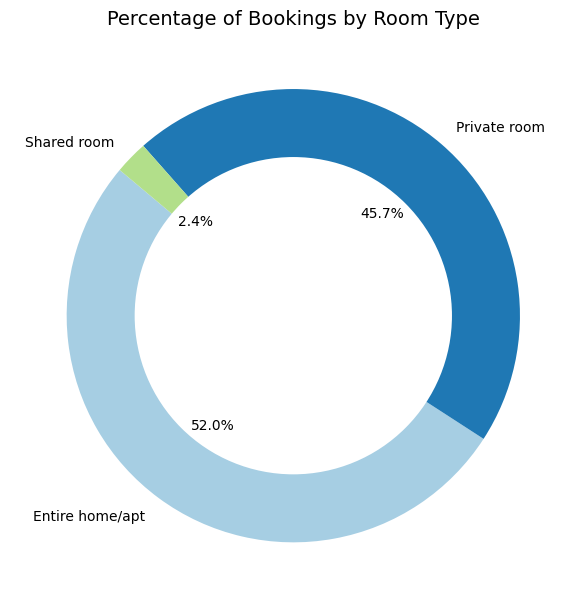

In [48]:
# chart - 11 visualization code
booking_counts = airbnb_df['room_type'].value_counts()

# Plotting the donut chart
plt.figure(figsize=(6, 8))
wedges, texts, autotexts = plt.pie(
    booking_counts,
    labels=booking_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired(range(len(booking_counts)))
)

# Draw a circle at the center to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# plt.legend(title='Room type')

# Add title
plt.title('Percentage of Bookings by Room Type', fontsize=14)

# Adjust layout to make it look better
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?


Answere Here. Donut chart is more visually appealing and less cluttered compared to traditional pie charts. I also want to analyse the percentage of bookings based on the room_types.

##### 2. What is/are the insight(s) found from the chart?


Answere Here. From the donut chart, we can observe that the majority of bookings are for the "Entire home/apt" category, which occupies approximately 52% of the chart. This indicates a strong preference among users for entire properties, possibly due to the privacy and space they offer. The next significant segment is "Private room" with around 45.7%, suggesting that a good number of customers prefer a more budget-friendly option while still seeking some privacy. The "Shared room" category, with the smallest segment at around 2.4%, shows that this type of accommodation is the least preferred among the users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answere Here. Yes These insights can help property owners and managers to tailor their offerings and marketing strategies to align with customer preferences. The insights also reveals that the majority of bookings are for "Entire home/apt" and "Private room" categories. Property owners and managers can focus on increasing the availability of these types of accommodations to meet customer demand. This can lead to higher bookings and revenue for shared rooms.

#### Chart - 12 Top 10 Host

<ipython-input-49-7bc17f83f6ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette = 'inferno')   #inferno, magma, plasma , viridis,blues,greens,coolwarms,cubehelix


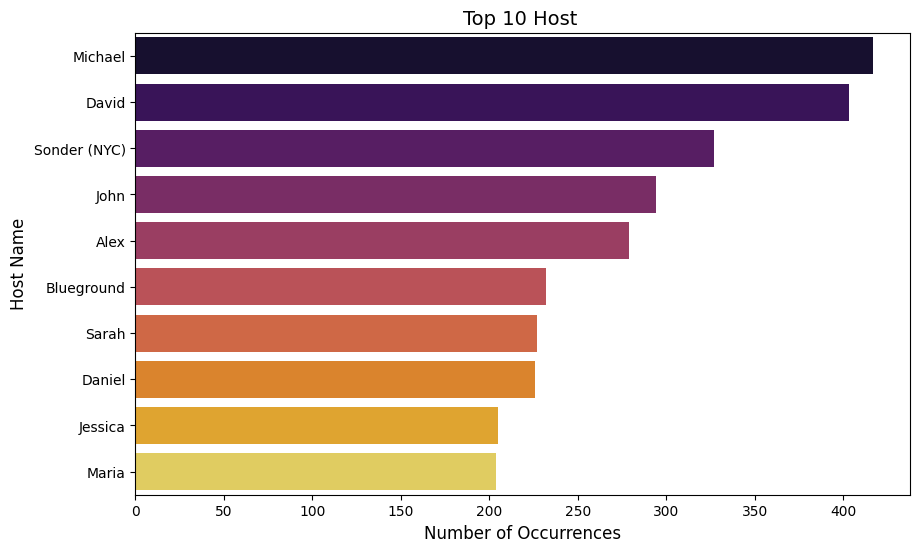

In [49]:
# chart - 12 visualization code
top_customers = airbnb_df['host_name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette = 'inferno')   #inferno, magma, plasma , viridis,blues,greens,coolwarms,cubehelix
plt.title('Top 10 Host ', fontsize=14)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Host Name', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?


Answere Here. Horizontal bar chart was picked to analyse the top 10 Host with maximum number of occurrences.

##### 2. What is/are the insight(s) found from the chart?


Answere Here. The chart gives the top 10 host which is repeatedly occured booked. This will help us to identify the top host name and the marketing team can aim such host and also give some priority due to there maximum times of occurences and contributing to the revenue generation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Answere Here. Yes this will lead to the positive businesss impact because it will clearly states the host name with maximum times of occurences.

#### Chart - 13 Top 10 Neighbour hoods

<ipython-input-50-302d288fd76e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =top_neighbourhoods.values, y=top_neighbourhoods.index, palette = 'plasma')


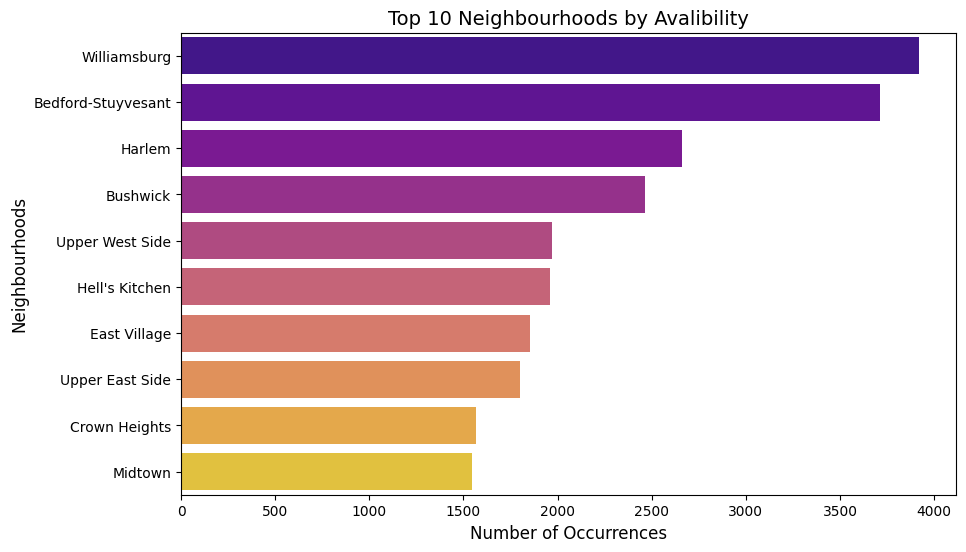

In [50]:
# chart - 13 visualization code
top_neighbourhoods = airbnb_df['neighbourhood'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x =top_neighbourhoods.values, y=top_neighbourhoods.index, palette = 'plasma')
plt.title('Top 10 Neighbourhoods by Avalibility', fontsize=14)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Neighbourhoods', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?


Answere Here. I had picked this chart to analyse the top 10 neighbourhoods based on their availability

##### 2. What is/are the insight(s) found from the chart?


Answere Here. I have observed that Williamsburg, Bedford-Stuyvesant, and Harlem have the highest occurrence rates in terms of bookings. This suggests that these neighborhoods are significantly contributing to the overall revenue, reflecting a positive outcome for the business solution in these areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Answere Here. By Knowing that Williamsburg, Bedford-Stuyvesant, and Harlem are top performers in neighbourhoods allows us to focus marketing efforts and promotions in these neighborhoods, potentially boosting visibility and bookings.

With high-performing neighborhoods identified, The host (property owners) can allocate resources and optimize operations to cater to these areas, improving service quality and customer satisfaction.

#### Chart - 14 Distribution of Number of Reviews based on Neighbourhood group

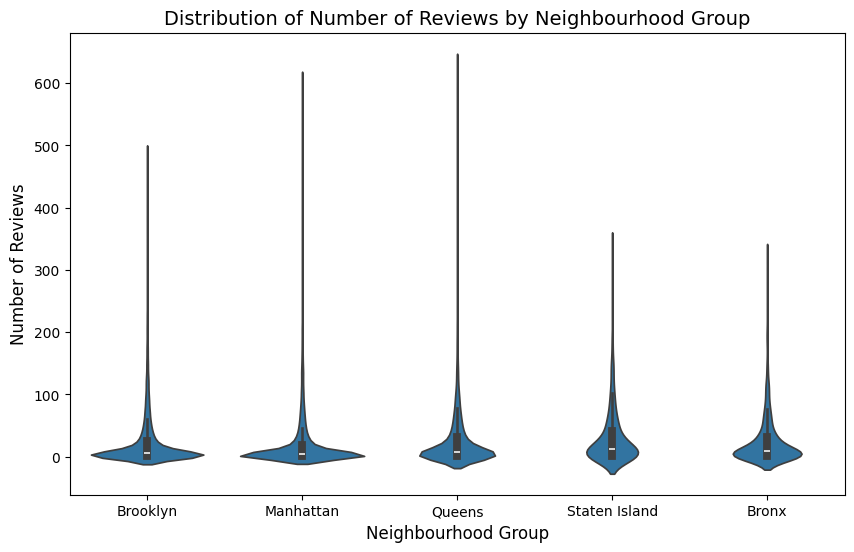

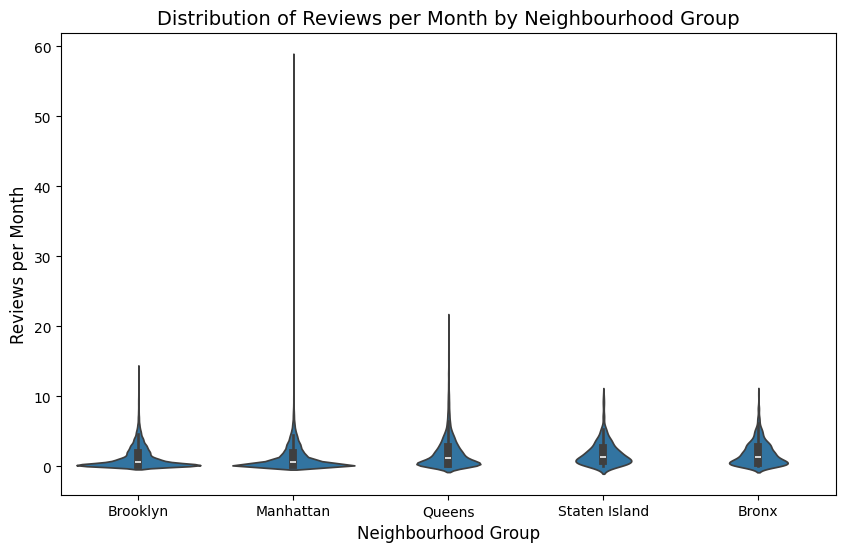

In [51]:
# chart - 14 visualization code
grouped_data = airbnb_df.groupby('neighbourhood_group').agg({
    'number_of_reviews': 'sum',
    'reviews_per_month': 'sum'
}).reset_index()

# Print the grouped data
# print("Grouped Data:")
# print(grouped_data)

plt.figure(figsize=(10, 6))
sns.violinplot(x='neighbourhood_group', y='number_of_reviews', data=airbnb_data)
plt.title('Distribution of Number of Reviews by Neighbourhood Group', fontsize=14)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='neighbourhood_group', y='reviews_per_month', data=airbnb_data)
plt.title('Distribution of Reviews per Month by Neighbourhood Group', fontsize=14)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Reviews per Month', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?


Answere Here. The violin plot was picked to analyse the numbers of bookings by neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

Answere Here. By plotting the chart, I found that Queens and Manhattan receive a considerably higher number of reviews each month compared to other neighborhoods. In contrast, Brooklyn, Staten Island, and the Bronx show a significantly lower volume of reviews on a monthly basis. This disparity highlights that Queens and Manhattan are far more active in terms of guest feedback, while the other areas experience much less engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Answere Here. Brooklyn, Staten Island, and the Bronx having fewer reviews may suggest lower customer engagement or satisfaction. This could be attributed to factors such as reduced visibility, less attractive features, or less competitive pricing. If these issues are not addressed, they could result in stagnation or a decline in bookings and revenue for these areas.

#### Chart - 15 Total Revenue Distribution by room type

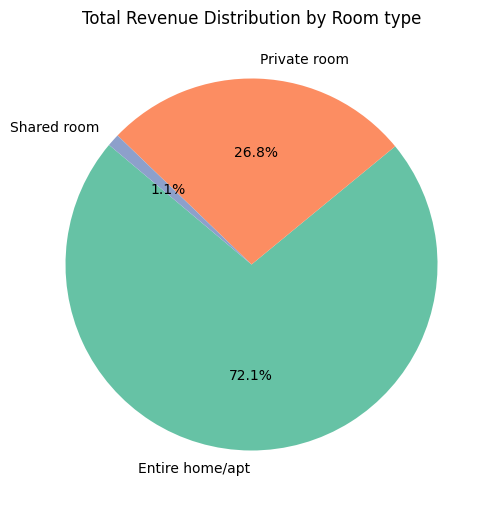

In [52]:
# chart - 15 visualization code
total_revenue_by_room_type = airbnb_df.groupby('room_type')['price'].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 8))

plt.pie(total_revenue_by_room_type, labels=total_revenue_by_room_type.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors,)
plt.title('Total Revenue Distribution by Room type')
plt.show()

##### 1. Why did you pick the specific chart?


Answere Here. The total revenue genreated by room type can be easily analyzed by plotting the pie chart. From this chart we can identify the trends of revenue generated by each room type. Hence this specific chart has picked

##### 2. What is/are the insight(s) found from the chart?


Answere Here. The "Entire home/apt" category dominates with 72.1% of the total revenue, while "Private room" contributes 26.8%, and "Shared room" generates the least revenue at 1.1%. This suggests that the majority of revenue comes from "Entire home/apt" rentals, whereas "Shared room" rentals account for a minimal portion of the revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answere Here.

Positive Impact: The "Entire home/apt" category, generating 72.1% of the total revenue, represents a highly successful segment of the business. This strong performance underscores its appeal and market demand, indicating that guests are willing to pay a premium for the privacy and amenities offered by entire home or apartment rentals.

Negative Impact: The low revenue generated by "Shared room" rentals, which accounts for only 1.1% of the total, indicates a significant underperformance in this segment. This underperformance could negatively impact overall business profitability. To address this issue, it is crucial for both marketing teams and hosts to develop targeted strategies to enhance the attractiveness and profitability of shared room offerings. Improving marketing efforts and optimizing shared room experiences could potentially boost revenue in this segment and contribute to a more balanced revenue distribution.

#### Chart - 16 Top 10 Name

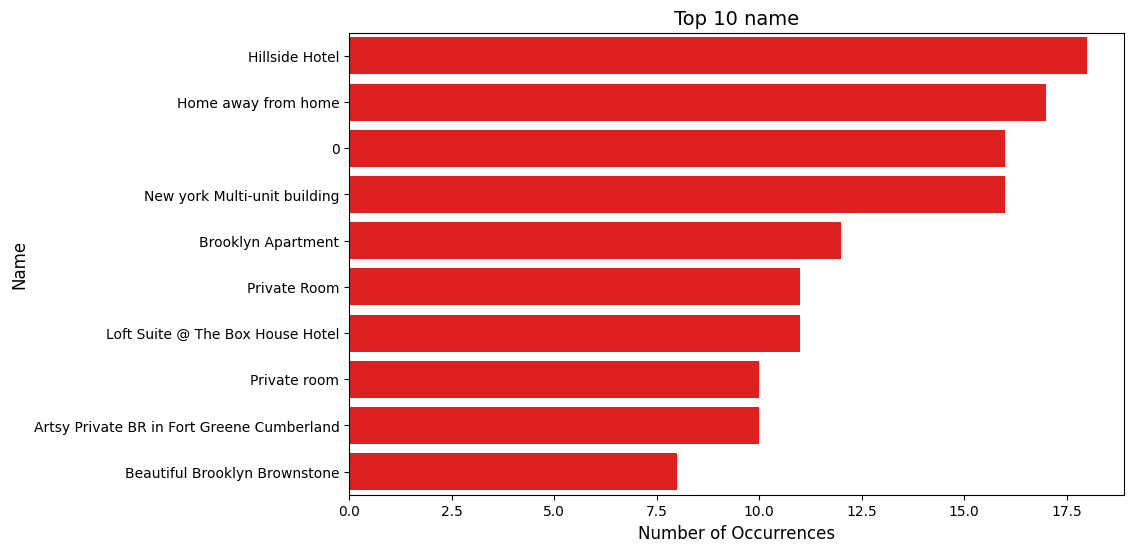

In [53]:
# chart - 16 visualization code
top_neighbourhoods = airbnb_df['name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x =top_neighbourhoods.values, y=top_neighbourhoods.index, color = 'red')
plt.title('Top 10 name', fontsize=14)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Name', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?


Answere Here. Horizontal bar charts are effective for displaying categorical data, especially when you have long category names or when the number of categories is relatively large. Horizontal layout makes it easier to read and compare the top 10 most frequent names.

##### 2. What is/are the insight(s) found from the chart?


Answere Here. The chart identifies the top 10 host names which are most frequently listed in the dataset. From this i have identified the popular hosts or those with multiple properties. The hillside hotel is dominating with most number of time occurence. By examining the length of the bars, we can see how many occurrences each host name has. This can highlight which hosts dominate the market or have a significant presence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Answere Here.  Recognizing the most frequently listed hosts, such as "Hillside Hotel", "Home away from home" can help in understanding which properties are popular and successful. This insight can be used to develop strategies that leverage these successful elements to enhance other listings or attract more guests.  The success of top hosts provides benchmarks for other hosts. By analyzing their listing strategies, pricing, and amenities, other hosts can adopt best practices to improve their own performance.

#### Chart - 17 Count of room types by Neighbouhood group

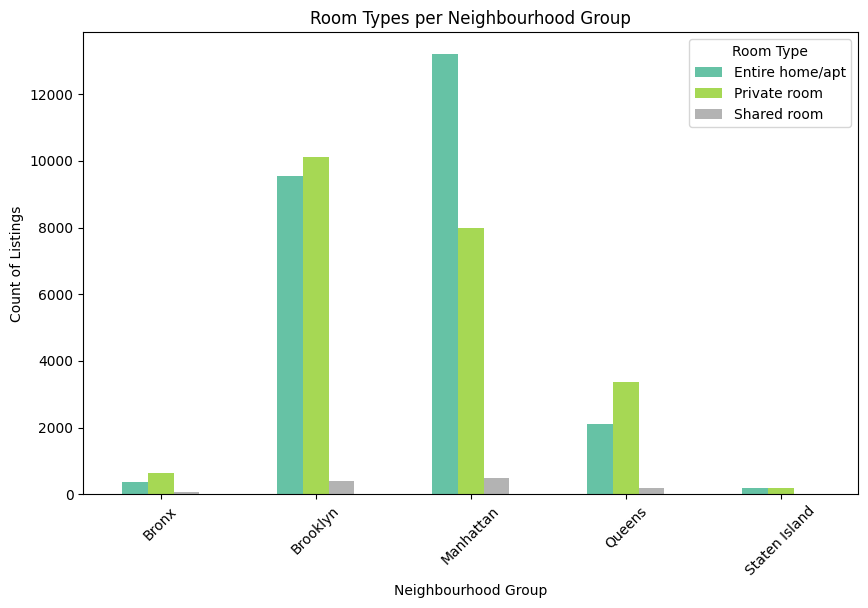

In [54]:
# chart - 17 visualization code
room_type_counts = airbnb_df.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
room_type_counts.plot(kind='bar', figsize=(10, 6), colormap='Set2',)

plt.title('Room Types per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()


##### 1. Why did you pick the specific chart?


Answere Here. By plotting the vertical bar chart we can analyze the count of listings (room_type) in neighbourhood group.

##### 2. What is/are the insight(s) found from the chart?


Answere Here. I observed that both the "Entire home/apt" and "Private room" categories are well-represented across all neighborhood groups, indicating their widespread appeal and significant presence in various locations. These categories appear consistently, suggesting strong demand and popularity in diverse areas.

In contrast, the "Shared room" category is notably less dominant. Its lower presence across neighborhood groups highlights a reduced demand or preference for shared accommodations compared to the other types. This limited representation could point to challenges in attracting guests for shared rooms or a preference shift toward more private accommodations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answere Here.

Positive Impact: With clear demand for "Entire home/apt" and "Private room" types, there is an opportunity to strategically expand listings in neighborhoods where these categories are already successful. This targeted approach can lead to better market penetration and growth in high-demand areas.

Negative Impact: The lower presence of "Shared room" across neighborhood groups indicates that this category is underperforming. This could suggest limited appeal or a need for improvement in the shared room offerings to attract more guests.

#### Chart - 18 Revenue by Neighbourhood

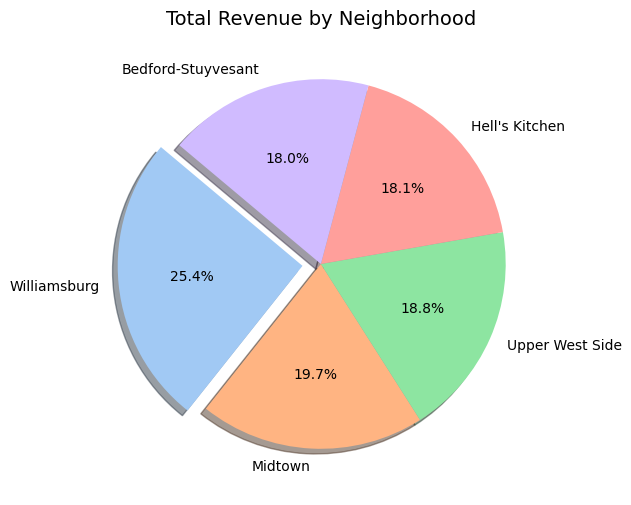

In [55]:
# chart - 18 visualization code
total_revenue_by_neighbourhood = airbnb_df.groupby('neighbourhood')['price'].sum().nlargest(5)

labels = total_revenue_by_neighbourhood.index
sizes = total_revenue_by_neighbourhood.values

# Define explode parameter to highlight the highest revenue neighborhood
explode = [0.1 if label == total_revenue_by_neighbourhood.idxmax() else 0 for label in labels]

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140, shadow = True)
plt.title('Total Revenue by Neighborhood', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?


Answere Here. The whole agenda to pick pie chart is to analyze the revenue generated by the top 5 neighborhoods because it offers a clear and immediate visual representation of how revenue is distributed across these areas.

##### 2. What is/are the insight(s) found from the chart?

Answere Here. From the pie chart it is found that amongst the top 5 neighbourhood the williamsburg and midtown is dominating in total revenue generated by the neighbourhood with 25.4% and 19.7% respectively, 1/4 revenue is generated by the williamsburg neighbourhood.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answere Here.
Williamsburg neighborhood accounts for 25% of the total revenue generated by the top 5 neighborhoods, highlighting its significant contribution to the overall revenue. This substantial share underscores Williamsburg's positive impact on the business, reflecting its strong performance and importance in revenue generation.

#### Chart - 19 Heat map

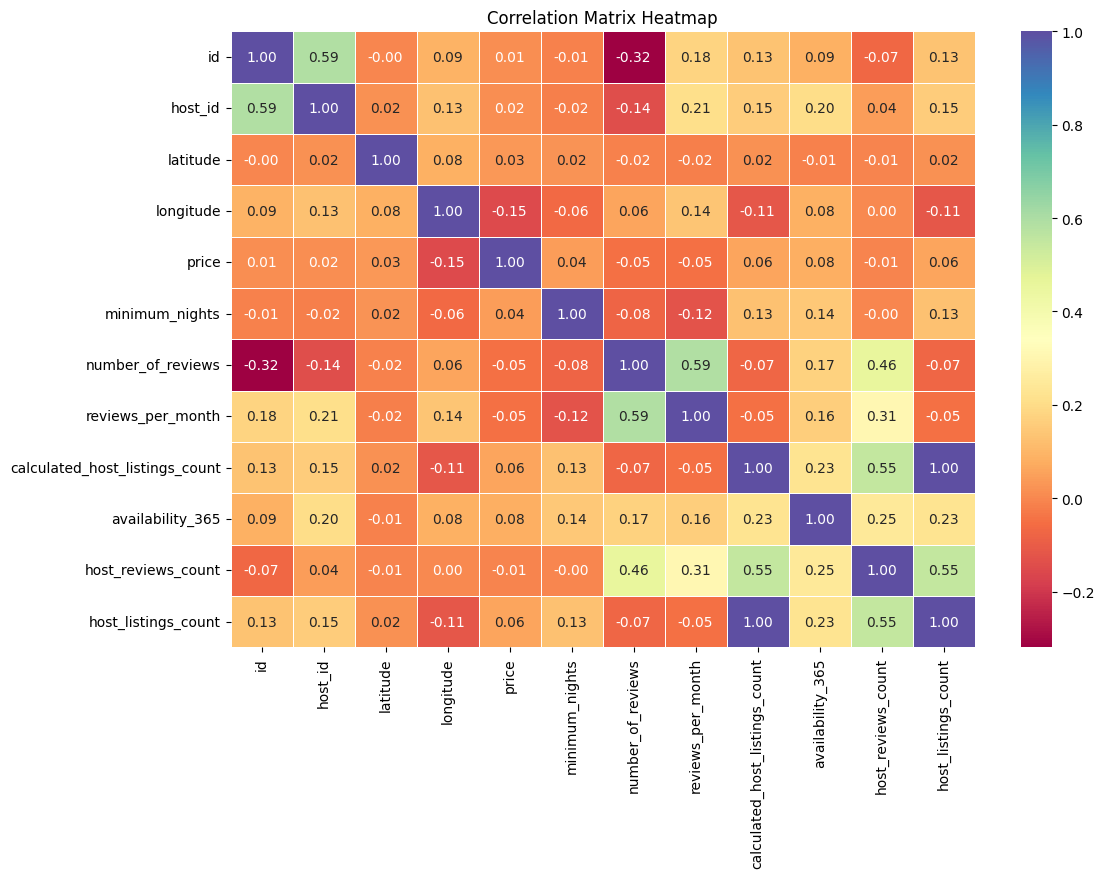

In [56]:
# chart - 19 visualization code
numeric_data = airbnb_df.select_dtypes(include=['number'])

# Compute the correlation matrix for the numerical data
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Spectral', linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

##### 1. Why did you pick the specific chart?


Answere Here. A correlation heatmap was picked to analyze the relationships between variables. When the correlation coefficient is close to 1, it indicates a strong positive correlation between the two variables.

##### 2. What is/are the insight(s) found from the chart?


Answere Here. A value of 0.59 indicates that as the total number of reviews increases, the reviews per month also tend to rise, though not in a perfectly linear manner. This suggests that listings with a higher overall count of reviews are likely to receive more reviews each month, but other factors might also play a role in this relationship. Hence when number of reviews increases the reviews per month aslo increase this will help to identify the total number of reviews

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answere Here. The correlation value of 0.59, which indicates that as the total number of reviews increases, the reviews per month also tend to rise, provides valuable insights for business strategy. This suggests that listings with a higher overall number of reviews are likely to receive more frequent reviews each month. Leveraging this information can have a positive business impact in several ways.

#### Chart - 20 Pair PLot

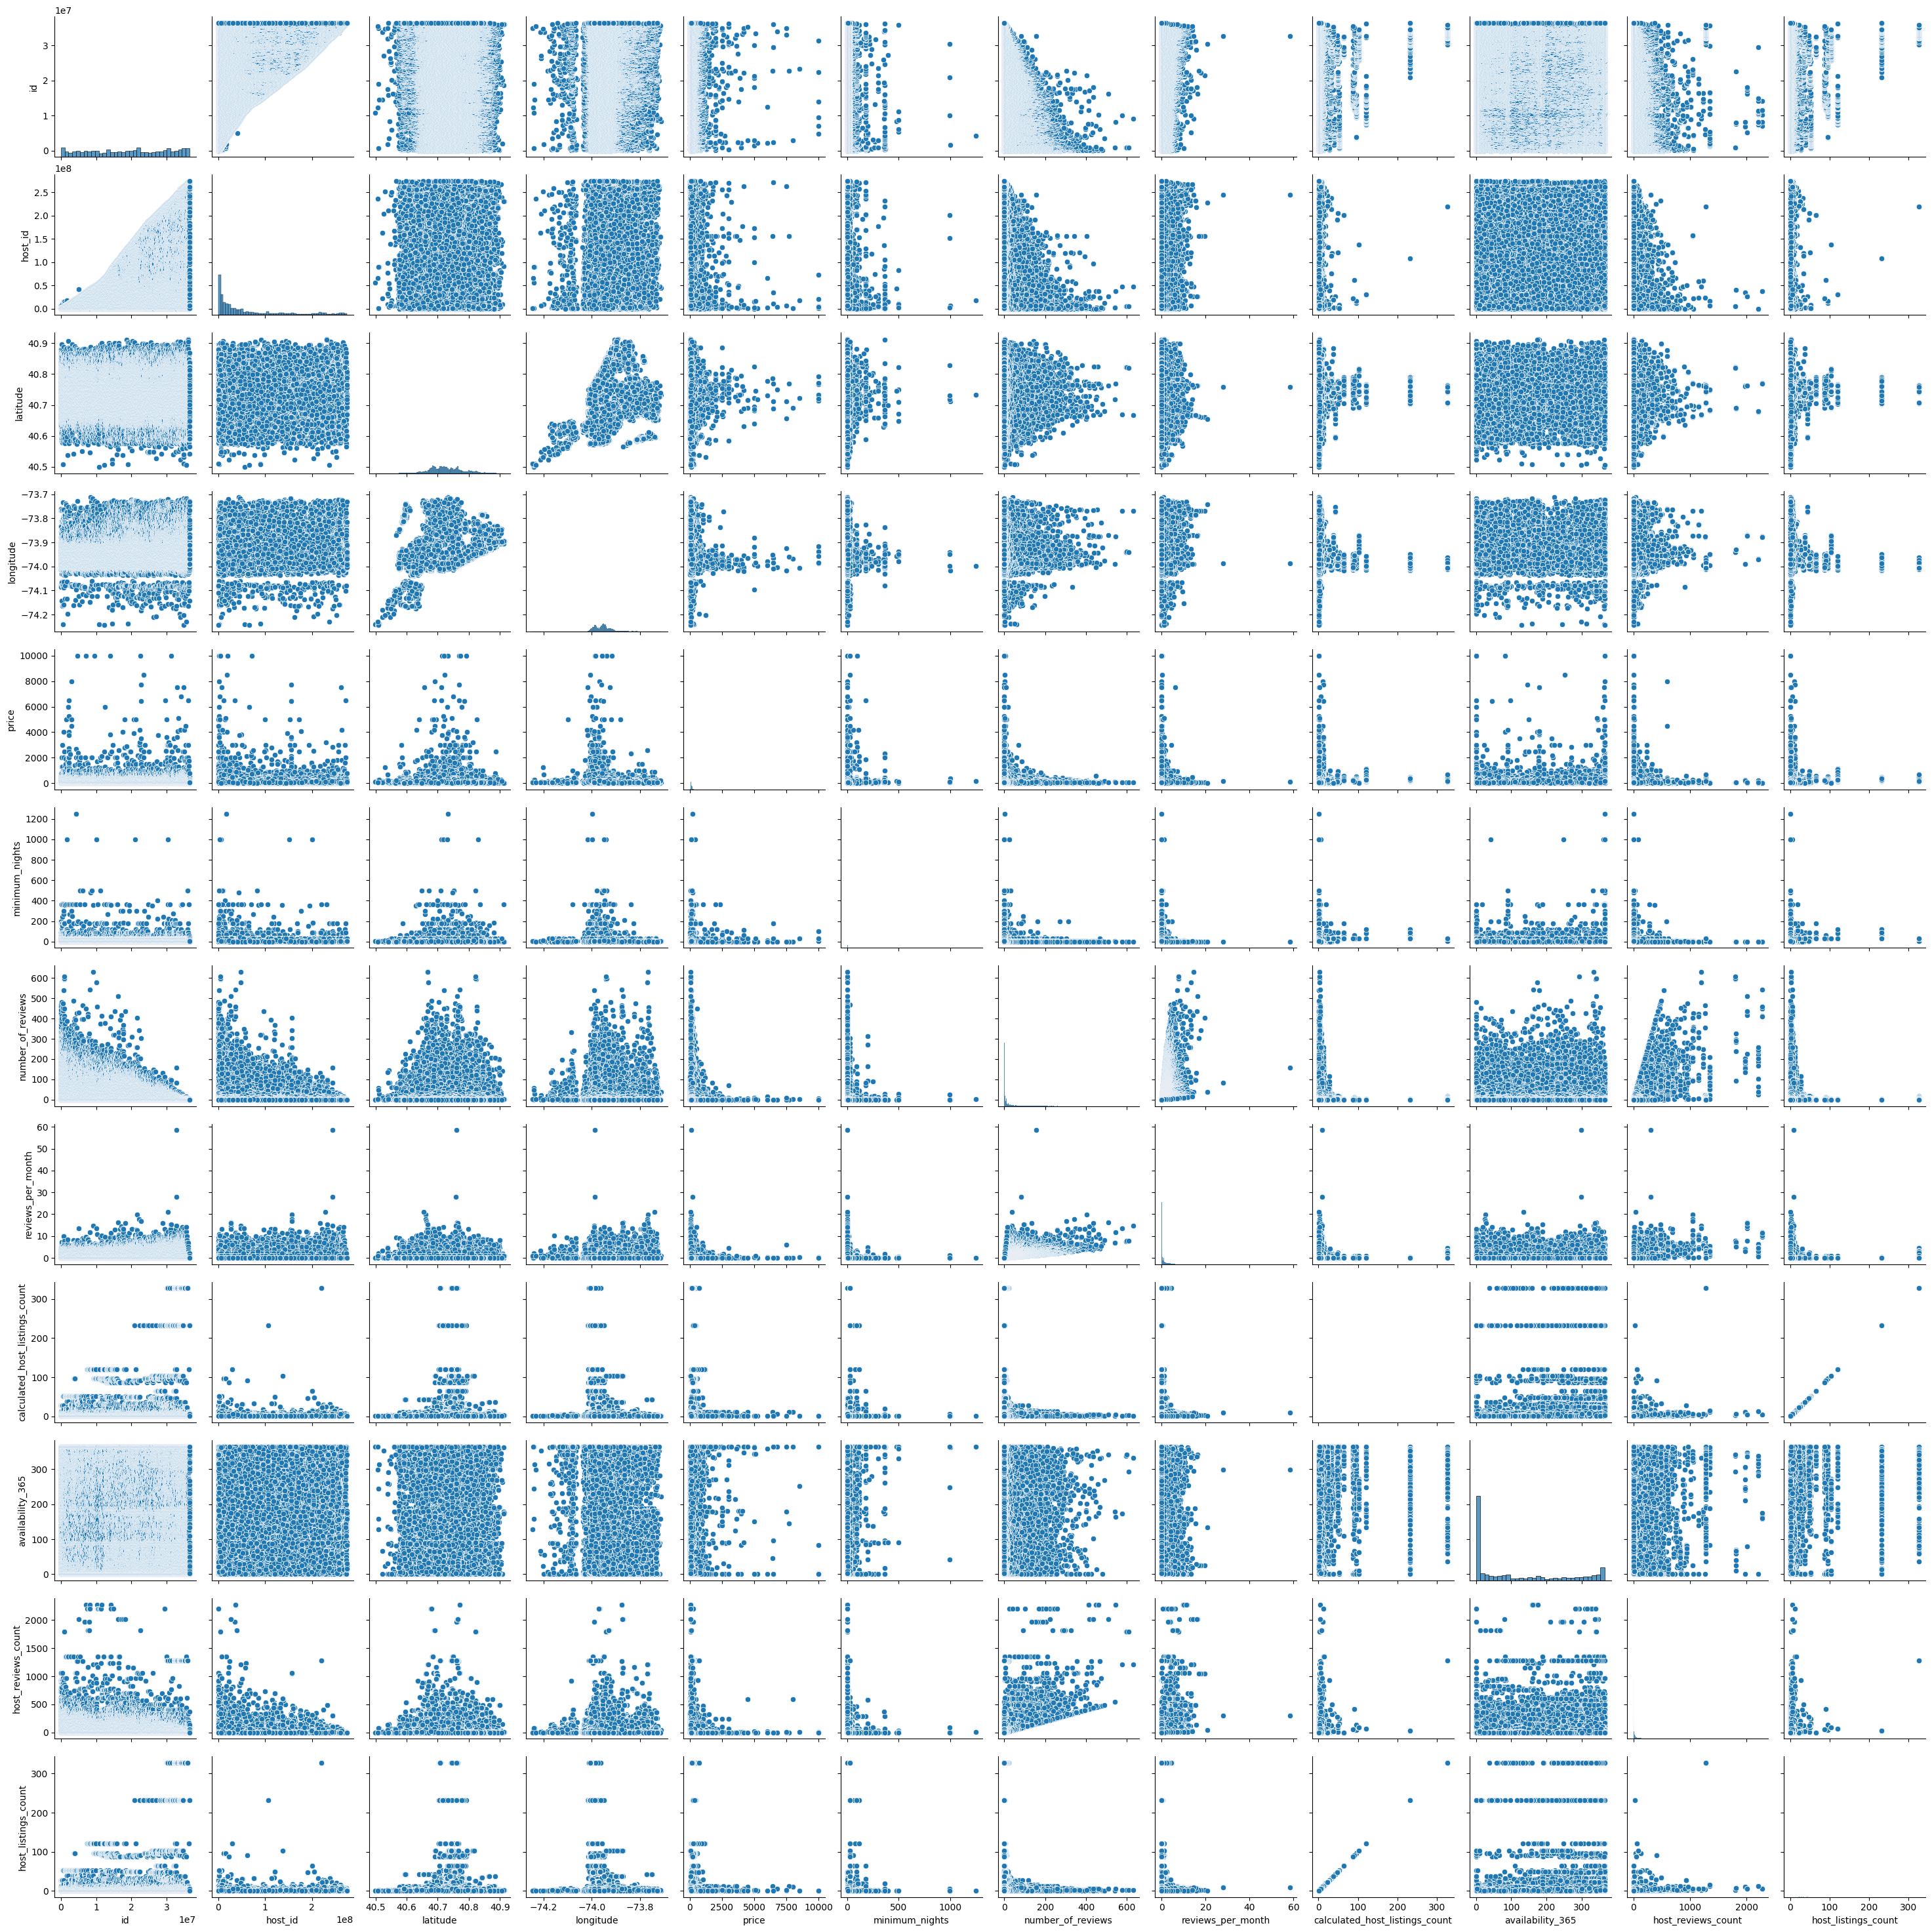

In [57]:
# chart - 20 visualization code
sns.pairplot(airbnb_df)
plt.show()

##### 1. Why did you pick the specific chart?


Answere Here. I have picked this specific chart because, pairplot from Seaborn generates a matrix of scatterplots that display the relationships between all pairs of numerical features in the dataset. This visualization provides a comprehensive view of how features interact and their individual distributions.

##### 2. What is/are the insight(s) found from the chart?


Answere Here.The scatter plot of availability_365 shows a strong relationship with host_id, suggesting that certain hosts have significantly higher availability throughout the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answere Here. Yes the gained insights will help to create a positive business impact, by identifying hosts with higher availability, we can target marketing efforts and promotions to these hosts, encouraging them to take advantage of seasonal trends or special offers. This can help increase bookings and revenue.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here. By performing (EDA) on Airbnb datasets some of the business Objective that i want to suggest to the client those are as follows:

1. Entire/Home Apt, private room is more preferred as compare to the shared rooms the properties owners and the marketing team should influence the customers for shared rooms as it will increase the number of bookings for shared rooms.

2. The percentage of bookings is highest in Manhattan, Brooklyn and queens neighbourhood group and the Bronx and staten island has lowest bookings.According to these insights the business management team for booking has to take certain steps in order to grab the customers.

3. Increase the availability of the rooms in various neighbourhood group. the availability should be as high as possible but in case of Queens, Bronx, and Staten island has lower availability which in turn it will reduces the no of bookings in this three neighbourhood group due to the unavailability of the rooms.


4. Increase the number of room types for Entire/Home apt and Private rooms in staten island, Brooklyn, queens as both the room types is highly preferred by the customers this will increase the total revenues.


5. Optimize Pricing, Implement dynamic pricing based on demand and seasonality.




# **Conclusion**

Write the conclusion here.

By Performing Exploratory Data Analysis (EDA) on Airbnb Data sets has provided valuable insights into various aspects of the short-term rental market. By analyzing key variables such as room types, pricing strategies, neighborhood demand, and availability patterns, the project has illuminated critical trends and relationships that can significantly influence business decisions.

Overall, the EDA project has equipped us with actionable insights that can drive strategic decision-making, enhance operational efficiency, and ultimately contribute to the growth and success of the Airbnb platform. By leveraging these findings, the platform can better align its strategies with market dynamics, optimize revenue, and improve the overall guest and host experience.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***